Table of Content

1. Import libraries and data
2. Merging department and merged data frames
3. Create customers profiles
4. Profiles distribution visualization
5. Aggregate the max, mean, and min variables
6. Compare your customer profiles

#Importing libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#create path to import data

path = r'/Users/office/Desktop/Instacart Basket Analysis'

In [4]:
#import dataframe

ords_prods = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_low_activity.pkl'))

In [5]:
ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
1513,520620,120,1,3,11,NaN,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity
1514,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity
1515,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity
1516,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity
1517,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity


In [6]:
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441548 entries, 1513 to 32434211
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   order_id                1441548 non-null  int64         
 1   user_id                 1441548 non-null  object        
 2   order_number            1441548 non-null  int64         
 3   orders_day_of_week      1441548 non-null  int64         
 4   order_hour_of_day       1441548 non-null  int64         
 5   days_since_prior_order  1026350 non-null  float64       
 6   product_id              1441548 non-null  int64         
 7   add_to_cart_order       1441548 non-null  int64         
 8   reordered               1441548 non-null  int64         
 9   product_name            1440349 non-null  object        
 10  aisle_id                1441548 non-null  int64         
 11  department_id           1441548 non-null  int64         
 12  prices         

In [8]:
#import departments_wrangled dataframe

df_wrangled = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

In [9]:
df_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [10]:
df_wrangled.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
#rename unnamed:0 column to department_id

df_wrangled.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_wrangled.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


#Merging df_wrangled with ords_prods to get department names for analysis

In [12]:
#merging data frames


df_merged = ords_prods.merge(df_wrangled, on = 'department_id')
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag,department
0,520620,120,1,3,11,NaN,196,2,0,Soda,...,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity,beverages
1,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity,beverages
2,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity,beverages
3,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity,beverages
4,906054,120,2,4,7,15.0,31102,1,0,Sugar Free Energy Drink,...,Female,Kentucky,54,2017-03-02,2,married,99219,South,low activity,beverages


In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441548 entries, 0 to 1441547
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   order_id                1441548 non-null  int64         
 1   user_id                 1441548 non-null  object        
 2   order_number            1441548 non-null  int64         
 3   orders_day_of_week      1441548 non-null  int64         
 4   order_hour_of_day       1441548 non-null  int64         
 5   days_since_prior_order  1026350 non-null  float64       
 6   product_id              1441548 non-null  int64         
 7   add_to_cart_order       1441548 non-null  int64         
 8   reordered               1441548 non-null  int64         
 9   product_name            1440349 non-null  object        
 10  aisle_id                1441548 non-null  int64         
 11  department_id           1441548 non-null  int64         
 12  prices        

#Creating customer profiles by age groups

In [14]:
df_merged['age'].min()

18

In [15]:
df_merged['age'].max()

81

#create age groups between 18 and 81

In [16]:
#Age group 18 to 29

df_merged.loc[(df_merged['age'] >= 18) & (df_merged['age'] <= 29), 'age_group'] = '18-29 years old'

In [19]:
#Age group 30 to 44

df_merged.loc[(df_merged['age'] >= 30) & (df_merged['age'] <= 64), 'age_group'] = '30-44 years old'

In [20]:
#Age group 45 to 59

df_merged.loc[(df_merged['age'] >= 45) & (df_merged['age'] <= 59), 'age_group'] = '45-59 years old'

In [22]:
#Age group 60 to 81

df_merged.loc[(df_merged['age'] >= 60) & (df_merged['age'] <= 81), 'age_group'] = '60-81 years old'

In [23]:
df_merged['age_group'].value_counts(dropna = False)

age_group
60-81 years old    493209
30-44 years old    338546
45-59 years old    336710
18-29 years old    273083
Name: count, dtype: int64

#Income groups

In [24]:
df_merged['income'].min()

25986

In [25]:
df_merged['income'].max()

550917

In [26]:
df_merged['income'].mean()

94318.9156732901

#Creating income groups that ranges between $25,903 and $593,901

In [28]:
#under $50K

df_merged.loc[df_merged['income']<50000,'income_group']='lower income'

In [29]:
#50,000 and $100,000

df_merged.loc[(df_merged['income']>=50000) & (df_merged['income']<100000),'income_group']='middle income'

In [30]:
#$100,000 or more

df_merged.loc[df_merged['income'] >= 100000, 'income_group'] = 'high income'

In [31]:
df_merged['income_group'].value_counts(dropna= False)

income_group
high income      607918
middle income    601908
lower income     231722
Name: count, dtype: int64

#Dependant groups

In [33]:
df_merged['n_dependants'].min()

0

In [34]:
df_merged['n_dependants'].mean()

1.5034553133159632

In [35]:
df_merged['n_dependants'].max()

3

#Depandant count ranges from 0 to 3 dependants

In [36]:
#No dependant group

df_merged.loc[df_merged['n_dependants'] <= 0, 'dependants_group'] = 'no dependants'

In [37]:
#Has dependants

df_merged.loc[df_merged['n_dependants'] > 0, 'dependants_group'] = 'has dependants'

In [38]:
df_merged['dependants_group'].value_counts(dropna = False)

dependants_group
has dependants    1083383
no dependants      358165
Name: count, dtype: int64

In [39]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,region,activity_flag,department,age_group,income_group,dependants_group
0,520620,120,1,3,11,NaN,196,2,0,Soda,...,2017-03-02,2,married,99219,South,low activity,beverages,45-59 years old,middle income,has dependants
1,3273029,120,3,2,8,19.0,196,2,1,Soda,...,2017-03-02,2,married,99219,South,low activity,beverages,45-59 years old,middle income,has dependants
2,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,2017-03-02,2,married,99219,South,low activity,beverages,45-59 years old,middle income,has dependants
3,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,2017-03-02,2,married,99219,South,low activity,beverages,45-59 years old,middle income,has dependants
4,906054,120,2,4,7,15.0,31102,1,0,Sugar Free Energy Drink,...,2017-03-02,2,married,99219,South,low activity,beverages,45-59 years old,middle income,has dependants


#Creating profiles with new groups

In [42]:
#Checking marital status counts

df_merged['fam_status'].value_counts(dropna = False)

fam_status
married                             1013892
single                               231498
divorced/widowed                     126667
living with parents and siblings      69491
Name: count, dtype: int64

In [44]:
#Create a crosstab for 'marital_status' vs. 'dependants_group'

marital_dependants_crosstab =pd.crosstab(df_merged['dependants_group'],df_merged['fam_status'],dropna=False)

In [45]:
marital_dependants_crosstab.to_clipboard()

In [46]:
marital_dependants_crosstab

fam_status,divorced/widowed,living with parents and siblings,married,single
dependants_group,,,,
has dependants,0,69491,1013892,0
no dependants,126667,0,0,231498


In [47]:
#Create a crosstab for 'age_group' vs. 'dependants_group'

age_grp_dependants_crosstab =pd.crosstab(df_merged['age_group'],df_merged['dependants_group'],dropna=False)

In [48]:
age_grp_dependants_crosstab.to_clipboard()

In [49]:
age_grp_dependants_crosstab

dependants_group,has dependants,no dependants
age_group,,
18-29 years old,207405,65678
30-44 years old,256059,82487
45-59 years old,253377,83333
60-81 years old,366542,126667


In [50]:
df_merged['income_group'].value_counts(dropna= False)

income_group
high income      607918
middle income    601908
lower income     231722
Name: count, dtype: int64

In [51]:
df_merged['age_group'].value_counts(dropna = False)

age_group
60-81 years old    493209
30-44 years old    338546
45-59 years old    336710
18-29 years old    273083
Name: count, dtype: int64

#Create a profiling variable based on age, marital status, and number of dependents

In [53]:
#single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['dependants_group'] == 'no dependants'),'profile_1']= 'single young adult w/o dependants'

In [54]:
#single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['dependants_group'] == 'no dependants'),'profile_1']= 'single adult w/o dependants'

In [55]:
#single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['dependants_group'] == 'no dependants'),'profile_1']= 'single older adult w/o dependants'

In [56]:
#single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'single young adult with dependants'

In [58]:
#single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'single adult with dependants'

In [59]:
#single older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status']== 'living with parents and siblings') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'single older adult with dependants'

In [60]:
#married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status']== 'married') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'married young adult with dependants'

In [61]:
#married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'married adult with dependants'

In [62]:
#married older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status']== 'married') & (df_merged['dependants_group'] == 'has dependants'),'profile_1']= 'married older adult with dependants'

In [63]:
df_merged['profile_1'].value_counts(dropna = False)

profile_1
married adult with dependants          509436
married older adult with dependants    366542
single adult w/o dependants            165820
married young adult with dependants    137914
single older adult w/o dependants      126667
single young adult with dependants      69491
single young adult w/o dependants       65678
Name: count, dtype: int64

#Create a profiling variable based on age, marital status, income, and number of dependents

In [65]:
#low income single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'low income single young adult w/o dependants'

In [66]:
#low income single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'low income single adult w/o dependants'

In [68]:
#low income single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'low income single older adult w/o dependants'

In [69]:
#low income single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income single young adult with dependants'

In [70]:
#low income single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income single adult with dependants'

In [71]:
#low income single older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status']== 'living with parents and siblings') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income single older adult with dependants'

In [72]:
#low income married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status']== 'married') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income married young adult with dependants'

In [74]:
#low income married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income married adult with dependants'

In [75]:
#low income married older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status']== 'married') & (df_merged['income_group']== 'lower income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'low income married older adult with dependants'

In [77]:
#mid income single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single young adult w/o dependants'

In [78]:
#mid income single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single adult w/o dependants'

In [79]:
#mid income single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single older adult w/o dependants'

In [80]:
#mid income single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] =='living with parents and siblings') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single young adult with dependants'

In [81]:
#mid income single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single adult with dependants'

In [82]:
#mid income single older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single older adult with dependants'

In [83]:
#mid income married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married young adult with dependants'

In [84]:
#mid income married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married adult with dependants'

In [85]:
#mid income married older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='middle income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married older adult with dependants'

In [86]:
#high income single young adult w/o dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'high income single young adult w/o dependants'

In [87]:
#high income single adult w/o dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'high income single adult w/o dependants'

In [88]:
#high income single older adult w/o dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'].isin(['single', 'divorced/widowed'])) & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'no dependants'),'profile_2']= 'high income single older adult w/o dependants'

In [89]:
#high income single young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income single young adult with dependants'

In [91]:
#high income single adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income single adult with dependants'

In [92]:
#high income single older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'] == 'living with parents and siblings') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income single older adult with dependants'

In [93]:
#high income married young adult with dependants

df_merged.loc[(df_merged['age_group']== '18-29 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income married young adult with dependants'

In [95]:
#high income married adult with dependants

df_merged.loc[(df_merged['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income married adult with dependants'

In [96]:
#high income married older adult with dependants

df_merged.loc[(df_merged['age_group'] =='60-81 years old') & (df_merged['fam_status'] == 'married') & (df_merged['income_group']=='high income') & (df_merged['dependants_group'] == 'has dependants'),'profile_2']= 'high income married older adult with dependants'

In [97]:
df_merged['profile_2'].value_counts(dropna = False)

profile_2
high income married older adult with dependants    238717
mid income married adult with dependants           216196
high income married adult with dependants          212897
mid income married young adult with dependants     103593
high income single older adult w/o dependants       81793
low income married adult with dependants            80343
mid income married older adult with dependants      79196
mid income single adult w/o dependants              70799
high income single adult w/o dependants             67810
mid income single young adult with dependants       53114
mid income single young adult w/o dependants        50118
low income married older adult with dependants      48629
low income married young adult with dependants      30745
mid income single older adult w/o dependants        28892
low income single adult w/o dependants              27211
low income single older adult w/o dependants        15982
low income single young adult with dependants       14928
low 

In [98]:
#Exporting df_merged in a pkl format 

df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'all_merged.pkl'))

#Visualization of profile distribution

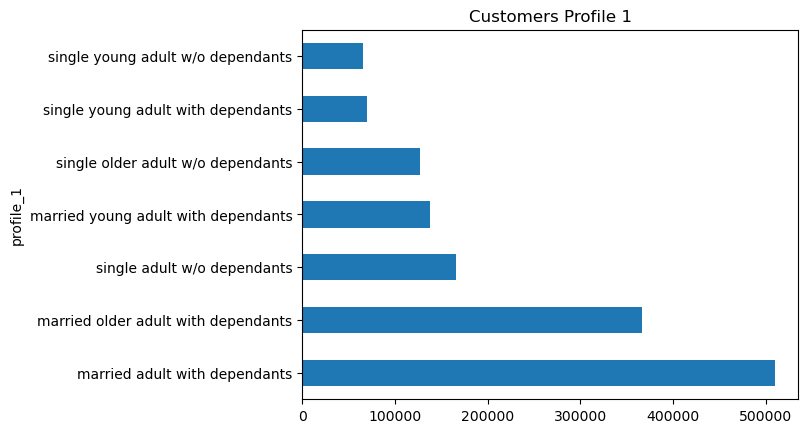

In [102]:
#Bar chart showing customers profile 1 counts

profile_1_bar=df_merged['profile_1'].value_counts().plot.barh(title='Customers Profile 1')

In [103]:
#exporting Customer Profile Bar Chart

profile_1_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customers Profile 1 Bar Chart.png'))

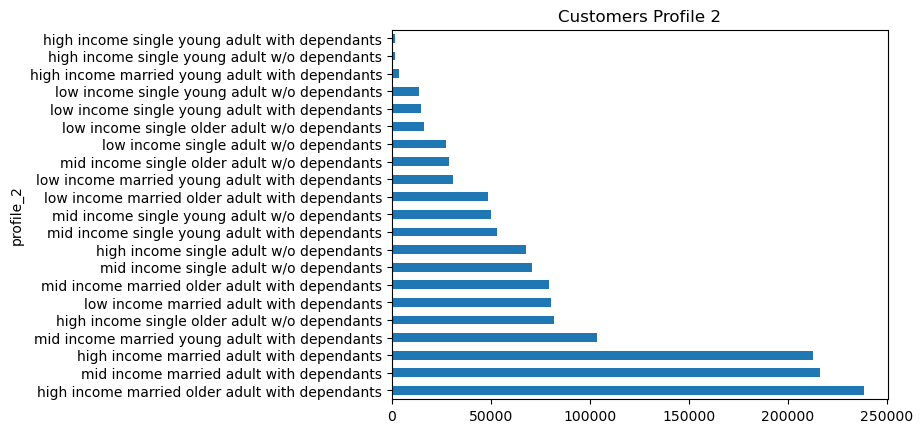

In [104]:
#Bar chart showing customers profile 2 counts

profile_2_bar=df_merged['profile_2'].value_counts().plot.barh(title='Customers Profile 2')

In [105]:
#exporting Customer Profile Bar Chart

profile_2_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customers Profile 2 Bar Chart.png'))

#Aggregate the min, max and mean variables

In [107]:
#Aggregate minimum,maximum, and mean of cutomer's age for usage and expenditure 

age_group_agg=df_merged.groupby('age_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [108]:
age_group_agg

days_since_prior_order                  prices           \
                                   min   max       mean    min      max   
age_group                                                                 
18-29 years old                    0.0  30.0  19.569355    1.0  99999.0   
30-44 years old                    0.0  30.0  19.557495    1.0  99999.0   
45-59 years old                    0.0  30.0  19.512938    1.0  99999.0   
60-81 years old                    0.0  30.0  19.410492    1.0  99999.0   

                            
                      mean  
age_group                   
18-29 years old  11.603447  
30-44 years old  13.548100  
45-59 years old  14.102722  
60-81 years old  12.598299

In [109]:
#Aggregate minimum,maximum, and mean of cutomer's income for usage and expenditure 

income_group_agg=df_merged.groupby('income_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [110]:
income_group_agg

days_since_prior_order                  prices           \
                                 min   max       mean    min      max   
income_group                                                            
high income                      0.0  30.0  19.433890    1.0  99999.0   
lower income                     0.0  30.0  19.538802    1.0     25.0   
middle income                    0.0  30.0  19.549553    1.0  99999.0   

                          
                    mean  
income_group              
high income    19.333435  
lower income    6.551627  
middle income   9.048197

In [111]:
#Aggregate minimum,maximum, and mean of cutomer's dependants for usage and expenditure 

dependants_group_agg=df_merged.groupby('dependants_group')[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [112]:
dependants_group_agg

days_since_prior_order                  prices           \
                                    min   max       mean    min      max   
dependants_group                                                           
has dependants                      0.0  30.0  19.533016    1.0  99999.0   
no dependants                       0.0  30.0  19.395910    1.0  99999.0   

                             
                       mean  
dependants_group             
has dependants    13.076783  
no dependants     12.704525

In [114]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_spend', 'spender_flag', 'median_order_frequency',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region', 'activity_flag',
       'department', 'age_group', 'income_group', 'dependants_group',
       'profile_1', 'profile_2'],
      dtype='object')

In [116]:
#Create a crosstab for frequency_flag and age_group

age_group_frequency=pd.crosstab(df_merged['order_frequency_flag'],df_merged['age_group'],dropna=False)

In [117]:
age_group_frequency

age_group,18-29 years old,30-44 years old,45-59 years old,60-81 years old
order_frequency_flag,,,,
Frequent customer,65823,83139,82087,124452
Non-frequent customer,142599,175319,173188,251120
Regular customer,64661,80088,81435,117637


#Compare customer prices

In [118]:
#Group by customer profile and region

customers_profile1_region=df_merged.groupby(['profile_1','region']).size().unstack()

In [119]:
#Sort 

customers_profile1_region=customers_profile1_region.loc[customers_profile1_region.sum(axis=1).sort_values(ascending=True).index]

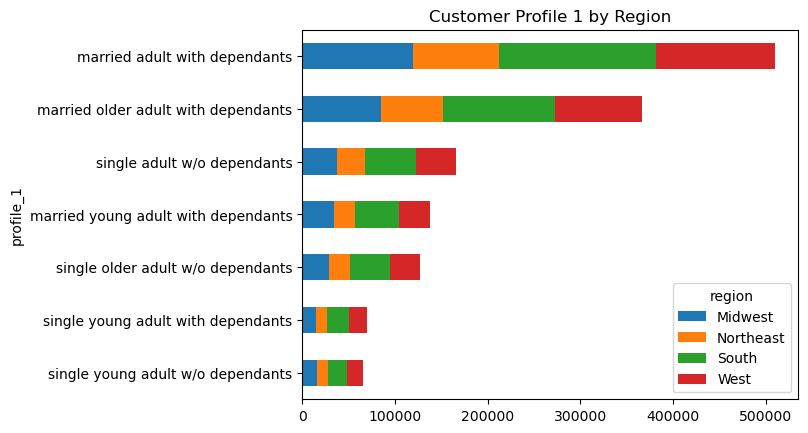

In [120]:
# Create bar chart

customers_profile1_region = customers_profile1_region.plot.barh(stacked = True, title ='Customer Profile 1 by Region')

#The west region has the most married with dependants customers

In [121]:
#Group by customer profile and region

customers_profile2_region=df_merged.groupby(['profile_2','region']).size().unstack()

In [122]:
#Sort 

customers_profile2_region=customers_profile2_region.loc[customers_profile2_region.sum(axis=1).sort_values(ascending=True).index]

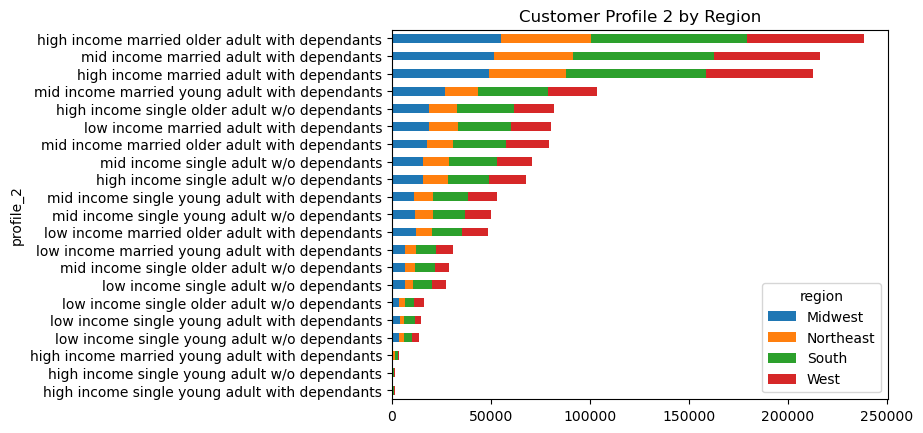

In [123]:
# Create bar chart

customers_profile2_region = customers_profile2_region.plot.barh(stacked = True, title ='Customer Profile 2 by Region')

In [124]:
#exporting Customer Profile by region

customers_profile1_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer Profile 1 by Region.png'))

In [125]:
#exporting Customer Profile by region
customers_profile2_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer Profile 2 by Region.png'))

In [126]:
#Group by customer profile and department 

customers_profile1_department=df_merged.groupby(['profile_1','department']).size().unstack()

In [127]:
#Sort 

customers_profile1_department=customers_profile1_department.loc[customers_profile1_department.sum(axis=1).sort_values(ascending=True).index]

Text(0, 0.5, 'Department')

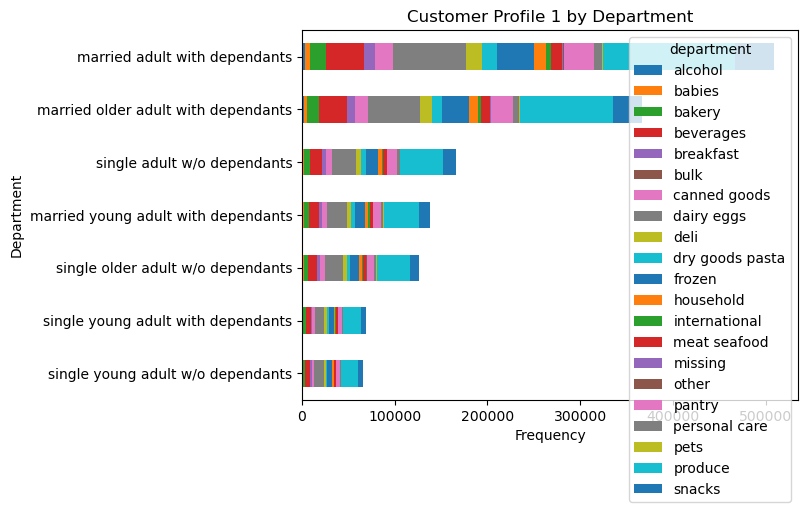

In [128]:
# Create bar chart

customers_profile1_department= customers_profile1_department.plot.barh(stacked = True, title ='Customer Profile 1 by Department')
plt.xlabel('Frequency')
plt.ylabel('Department')

#Snacks and produce are the top deparments specially for married with dependants

In [129]:
#exporting Customer Profile 1 by department

customers_profile1_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customers Profile 1 by Department.png'))

In [130]:
#Group by customer profile and department 

customers_profile2_department=df_merged.groupby(['profile_2','department']).size().unstack()

In [131]:
#Sort 

customers_profile2_department=customers_profile2_department.loc[customers_profile2_department.sum(axis=1).sort_values(ascending=True).index]

Text(0, 0.5, 'Department')

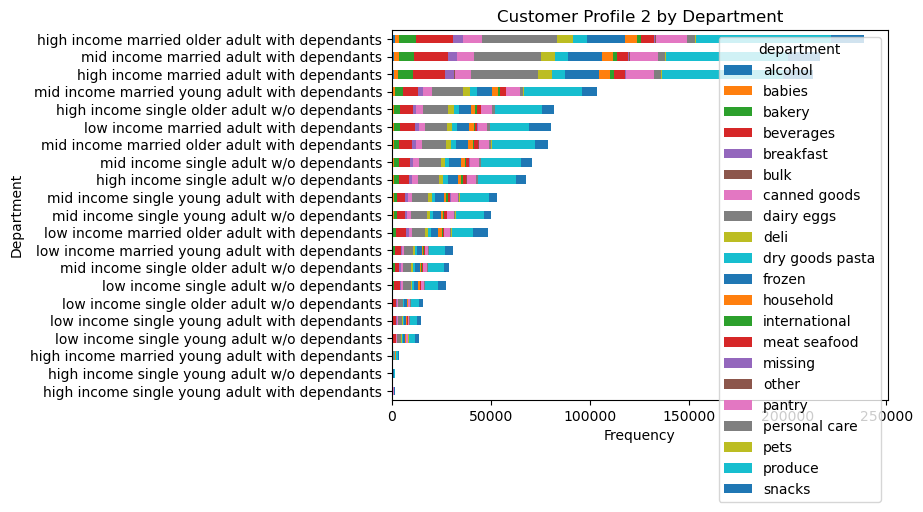

In [132]:
# Create bar chart

customers_profile2_department= customers_profile2_department.plot.barh(stacked = True, title ='Customer Profile 2 by Department')
plt.xlabel('Frequency')
plt.ylabel('Department')

In [133]:
#exporting Customer Profile 2 by department

customers_profile2_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customers Profile 2 by Department.png'))